## Оконные функции

Для аналоговых сигналов или для бесконечного по времени дискретного сигнала синусоидальной формы его спектр — это дельта-функция на частоте этого сигнала. На практике спектр реального ограниченного по времени гармонического сигнала эквивалентен функции
 "$$ \\{sin(x)}/{x} = sinc(x) $$\n",
а ширина главного лепестка зависит от длительности интервала анализа сигнала.
Ограничение по времени есть ни что иное как умножение сигнала на прямоугольную огибающую.

Из предыдущих лекций мы узнали, что умножение сигналов во временной области есть свертка их спектров в частотной (и наоборот: свертка сигналов во временной области есть произведение их спектров). Это также связано с тем, что мы не можем интегрировать сигнал на бесконечном интервале времени, а преобразование Фурье в дискретной форме, выраженное через конечную сумму — ограничено по числу отсчетов.

Как правило, длина БПФ в современных устройствах цифровой обработки принимает значенияот 8 до нескольких миллионов точек. Ограничивая сигнал на интервале, мы тем самым накладываем «окно» прямоугольной формы. Следовательно, результирующий спектр — есть спектр перемноженного гармонического сигнала и прямоугольной огибающей.


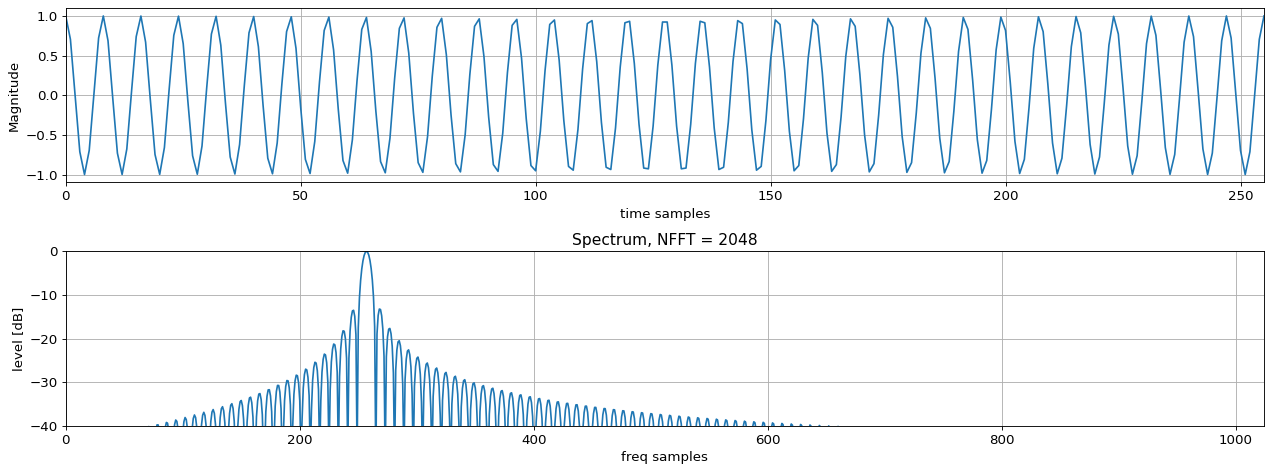

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift
import scipy.signal as sig

%matplotlib inline


# Input parameters
N = 256
NFFT = 2048

# Input signal (long: N >> NFFT)
tt = np.linspace(0, 1, N, endpoint=True)
xx = np.cos(2*np.pi*32*tt)

# Calculate FFT
sft = np.abs(fft(xx, NFFT))
slg = 20*np.log10(sft / np.max(sft))

plt.figure(figsize=(16, 6), dpi=80)
plt.subplot(2,1,1)
plt.xlabel('time samples')
plt.ylabel('Magnitude')
plt.plot(xx)
plt.xlim([0, N-1])
plt.grid(True)

plt.subplot(2,1,2)
plt.title('Spectrum, NFFT = {}'.format(NFFT))
plt.xlabel('freq samples')
plt.ylabel('level [dB]')
plt.plot(slg)
plt.xlim([0, NFFT//2])
plt.ylim([-40, 0])
plt.grid(True)
plt.tight_layout()


То есть, ограничение сигнала во времени приводит к наложению «окна» прямоугольной формы. На приведенном ниже примере длительность сигнала существенно увеличена. Как видно, спектр такого сигнала стремится к дельта-функции.

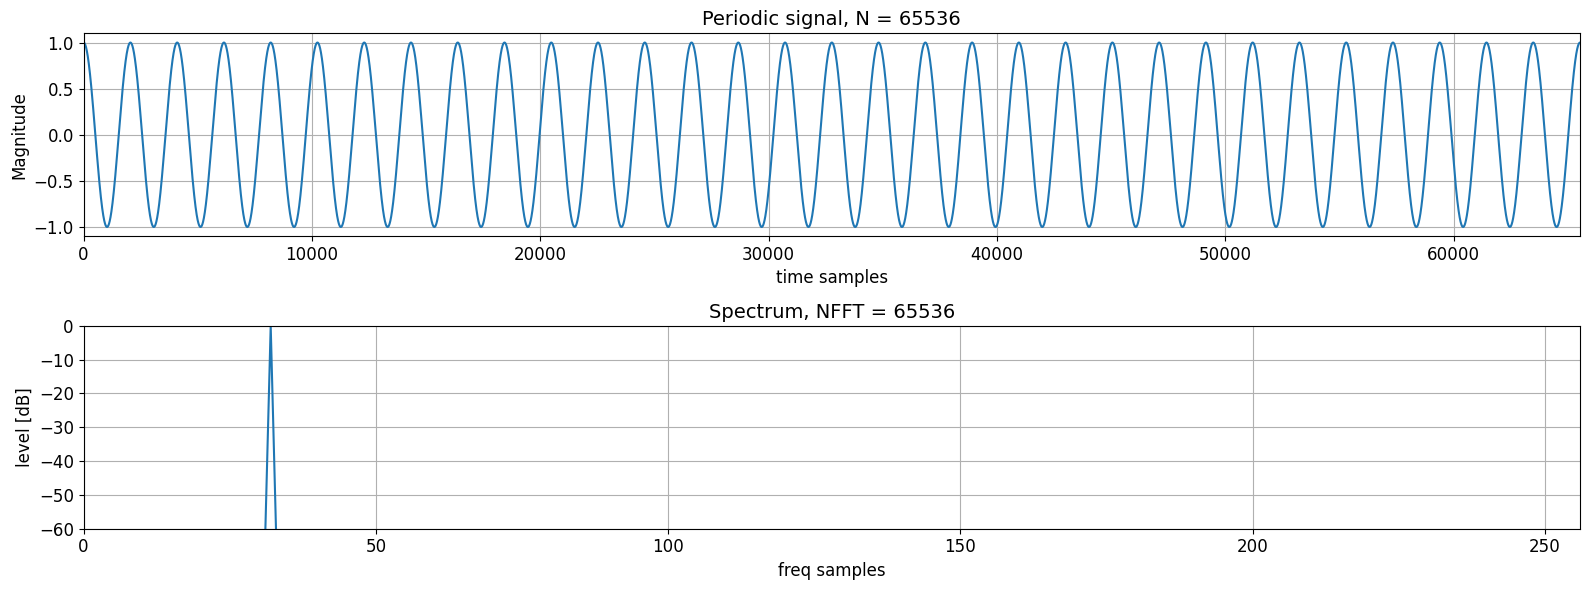

In [2]:


# Input parameters
N = 65536

# Input signal (long: N >> NFFT)
tt = np.linspace(0, 1, N, endpoint=True)
xx = np.cos(2*np.pi*32*tt)

# Calculate FFT
sft = np.abs(fft(xx, N))
slg = 20*np.log10(sft / np.max(sft))

plt.figure(figsize=(16, 6))
plt.subplot(2,1,1)
plt.title('Periodic signal, N = {}'.format(N))
plt.xlabel('time samples')
plt.ylabel('Magnitude')
plt.plot(xx)
plt.xlim([0, N-1])
plt.grid(True)

plt.subplot(2,1,2)
plt.title('Spectrum, NFFT = {}'.format(N))
plt.xlabel('freq samples')
plt.ylabel('level [dB]')
plt.plot(slg)
plt.xlim([0, N//256])
plt.ylim([-60, 0])
plt.grid(True)
plt.tight_layout()



При умножении сигнала на прямоугольное окно (усечение длинной последовательности до реального сигнала) происходит так называемый эффект "растекания спектра" или "размытия" 
спектра. 
Главная проблема размытия спектра связана с тем, что боковые лепестки более сильного сигнала могут скрыть в себе слабые сигналы. С помощью оконных функций можно 
снизить влияние растекания спектра.

В задачах цифровой обработки сигналов придуманы окна различной формы, которые при наложении на сигнал во временной области, позволяют качественно улучшить его спектральные характеристики. Большое количество всевозможных окон обусловлено в первую очередь одной из главных особенностей любого оконного наложения. Эта особенность выражается во взаимосвязи уровня боковых лепестков и ширины центрального лепестка.

Представим себе сигнал, который разбивается на несколько последовательностей, каждая из которых обрабатывается независимо, а затем сшивается в единый сигнал. При вычислении БПФ происходит наложение прямоугольного окна. Следовательно, последующее восстановление формы сигнала приведет к нежелательным эффектам, которые выражены в искажении формы сигнала на стыках (всплески сигнала). Для того, чтобы сгладить эти всплески можно применить оконную фильтрацию.

Основные оконные функции в задачах ЦОС — треугольное, синусоидальное, окно Ланцоша, Ханна, Хэмминга, Блэкмана, Харриса, Блэкмана-Харриса, окно с плоской вершиной, окно Наталла, Гаусса, Кайзера и множество других. 

## Задание 1
Найти описание как минимум 2 оконных функций (формулы). Составить программу наложения оконных функций на временной ряд вышеуказанной последовательности (N=256).
Предоставить результат

## Задание 2
Сделать все тоже самое, используя встроенный функционал генерации оконных массивов в библиотеки numPy